In [94]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.api.types import CategoricalDtype

In [49]:
plt.rcParams['figure.figsize'] = (8,8)
pd.set_option('display.max_columns', 500)

In [3]:
def create_col_name(base_str, start_int, end_int):
    return [base_str + str(i) for i in range(start_int, end_int+1)]

In [6]:
def load_data(data_dir, data_type, type_map, is_gz=False):
    if data_type not in ['train', 'test']:
        raise Exception('data_type can only be "train" or "test"')
    fp_id = '{}_identity.csv'.format(data_type)
    fp_trans = '{}_transaction.csv'.format(data_type)
    if is_gz:
        fp_id += '.gz'
        fp_trans += '.gz'
    df_id = pd.read_csv(os.path.join(data_dir, fp_id), dtype=type_map)
    df_trans = pd.read_csv(os.path.join(data_dir, fp_trans), dtype=type_map)
    return df_trans.merge(df_id, on='TransactionID', how='left')

In [4]:
cat_cols = (['ProductCD'] + create_col_name('card', 1, 6) + ['addr1', 'addr2', 'P_emaildomain', 'R_emaildomain'] + 
            create_col_name('M', 1, 9) + ['DeviceType', 'DeviceInfo'] + create_col_name('id_', 12, 38))

id_cols = ['TransactionID', 'TransactionDT']

target = 'isFraud'

In [5]:
type_map = {c: str for c in cat_cols}

In [7]:
df_train = load_data('data', 'train', type_map, is_gz=True)

In [8]:
df_test = load_data('data', 'test', type_map, is_gz=True)

In [9]:
numeric_cols = [col for col in df_train.columns.tolist() if col not in cat_cols + id_cols + [target]]

In [10]:
df_train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1 addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0  87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0  87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0  87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0  87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0  87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

# Feature Engineering
## Count NULLs

In [11]:
df_train['n_nulls'] = df_train.isnull().sum(axis=1)
df_test['n_nulls'] = df_test.isnull().sum(axis=1)

numeric_cols += ['n_nulls']

## Remove Version Numbers

In [96]:
df_train['id_30'].unique()[:20]

array(['<UNK>', 'Android 7.0', 'iOS 11.1.2', 'Mac OS X 10_11_6',
       'Windows 10', 'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5'],
      dtype=object)

In [97]:
df_test['id_30'].unique()[:20]

array(['<UNK>', 'Android 6.0.1', 'iOS 11.4.0', 'Windows 7', 'iOS 10.1.1',
       'Windows 10', 'Mac OS X 10_13_5', 'iOS 11.3.0', 'Linux',
       'Android 5.1.1', 'iOS 9.3.5', 'Android 7.0', 'iOS 11.2.6',
       'Mac OS X 10.13', 'Android 8.0.0', 'Windows 8.1', 'Android',
       'Mac OS X 10_12_6', 'iOS 10.3.3', 'Mac'], dtype=object)

In [12]:
for col in ['id_30', 'id_31']:
    df_train[col+'_clean'] = df_test[col].str.replace(r'[^A-Za-z]', '', regex=True)
    df_test[col+'_clean'] = df_test[col].str.replace(r'[^A-Za-z]', '', regex=True)
    cat_cols += [col+'_clean']

# Convert Categories to Ints for LightGBM

In [13]:
def cat_to_int(df_train, df_test, col):
    catDtype = CategoricalDtype(categories=df_train[col].value_counts().index.values)
    return df_train[col].astype(catDtype).cat.codes.values, df_test[col].astype(catDtype).cat.codes.values

In [25]:
df_train.loc[:,cat_cols] = df_train[cat_cols].fillna('<UNK>')
df_test.loc[:,cat_cols] = df_test[cat_cols].fillna('<UNK>')

df_train = df_train.fillna(-999)
df_test = df_test.fillna(-999)

In [26]:
cat_cols_encoded = list()
for col in cat_cols:
    df_train[col+'_code'], df_test[col+'_code'] = cat_to_int(df_train, df_test, col)
    cat_cols_encoded.append(col+'_code')

In [27]:
(df_test[cat_cols_encoded]==-1).mean().sort_values(ascending=False).head()

id_31_code         0.163332
id_30_code         0.033707
DeviceInfo_code    0.031309
card1_code         0.018473
id_19_code         0.010983
dtype: float64

# Modeling

In [28]:
from catboost import Pool, CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import KFold
from pandas.api.types import CategoricalDtype

In [29]:
features = cat_cols + numeric_cols

In [31]:
N_val = int(df_train.shape[0]*0.05)
df_val = df_train.sort_values(by='TransactionDT').tail(N_val)
df_train_sample = df_train[~df_train.index.isin(df_val.index)]
shuffle_ks = True

In [32]:
df_train.shape[0], df_train_sample.shape[0], df_val.shape[0]

(590540, 561013, 29527)

In [33]:
df_train_sample.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1 addr2  dist1  dist2  \
0  <UNK>  150.0    discover  142.0  credit  315.0  87.0   19.0 -999.0   
1  404.0  150.0  mastercard  102.0  credit  325.0  87.0 -999.0 -999.0   
2  490.0  150.0        visa  166.0   debit  330.0  87.0  287.0 -999.0   
3  567.0  150.0  mastercard  117.0   debit  476.0  87.0 -999.0 -999.0   
4  514.0  150.0  mastercard  102.0  credit  420.0  87.0 -999.0 -999.0   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0         <UNK>         <UNK>  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com         <UNK>  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com         <UNK>  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com         <UNK>  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com         <UNK>  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2     D3     D4     D5     D6     D7  \
0  0.0  2.0  0.0   1.0  1.0   14.0 -999.0   13.0 -999.0 -999.0 -999.0 -999.0   
1  0.0  1.0  0.0   1.0  1.0    0.0 -999.0 -999.0    0.0 -999.0 -999.0 -999.0   
2  0.0  1.0  0.0   1.0  1.0    0.0 -999.0 -999.0    0.0 -999.0 -999.0 -999.0   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0    0.0   94.0    0.0 -999.0 -999.0   
4  1.0  1.0  0.0   1.0  1.0    0.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   

      D8     D9    D10    D11    D12    D13    D14    D15     M1     M2  \
0 -999.0 -999.0   13.0   13.0 -999.0 -999.0 -999.0    0.0      T      T   
1 -999.0 -999.0    0.0 -999.0 -999.0 -999.0 -999.0    0.0  <UNK>  <UNK>   
2 -999.0 -999.0    0.0  315.0 -999.0 -999.0 -999.0  315.0      T      T   
3 -999.0 -999.0   84.0 -999.0 -999.0 -999.0 -999.0  111.0  <UNK>  <UNK>   
4 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0  <UNK>  <UNK>   

      M3     M4     M5     M6     M7     M8     M9     V1     V2     V3  \
0      T     M2      F      T  <UNK>  <UNK>  <UNK>    1.0    1.0    1.0   
1  <UNK>     M0      T      T  <UNK>  <UNK>  <UNK> -999.0 -999.0 -999.0   
2      T     M0      F      F      F      F      F    1.0    1.0    1.0   
3  <UNK>     M0      T      F  <UNK>  <UNK>  <UNK> -999.0 -999.0 -999.0   
4  <UNK>  <UNK>  <UNK>  <UNK>  <UNK>  <UNK>  <UNK> -999.0 -999.0 -999.0   

      V4     V5     V6     V7     V8     V9    V10    V11    V12    V13  \
0    1.0    1.0    1.0    1.0    1.0    1.0    0.0    0.0    1.0    1.0   
1 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    0.0    0.0   
2    1.0    1.0    1.0    1.0    1.0    1.0    0.0    0.0    1.0    1.0   
3 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    1.0    1.0   
4 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   

     V14    V15    V16    V17    V18    V19    V20    V21    V22    V23  \
0    1.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    1.0   
1    1.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    1.0   
2    1.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    1.0   
3    1.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    1.0   
4 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   

     V24    V25    V26    V27    V28    V29    V30    V31    V32    V33  \
0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    1.0    1.0    1.0    0.0    0.0    0.0    

In [34]:
def build_pool(df, features, cat_cols, target=None):
    if target:
        data = Pool(
            data=df[features],
            label=df[target],
            cat_features=cat_cols
        )
    else:
        data = Pool(
            data=df[features],
            cat_features=cat_cols
        )
        
    return data

In [58]:
train_data = build_pool(df_train_sample, features, cat_cols, target)
holdout_data = build_pool(df_val, features, cat_cols, target)

In [36]:
w = (df_train_sample[target]==0).sum() / (df_train_sample[target]==1).sum() / 5

In [54]:
params = {
    'iterations': 1500,
    'learning_rate': 0.05,
    #'depth': 15,
    'eval_metric': 'AUC',
    'od_type': 'Iter',
    'od_wait': 50,
    'task_type': 'GPU',
    'devices': '3',
    'scale_pos_weight': w,
}

In [ ]:
model_single = CatBoostClassifier(**params)
model_single.fit(train_data, eval_set=holdout_data, plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Train LightGBM

In [42]:
train_data_lgb = lgb.Dataset(
    data=df_train_sample[numeric_cols + cat_cols_encoded], 
    label=df_train_sample[target],
    categorical_feature=cat_cols_encoded,
    free_raw_data=False,
)

holdout_data_lgb = lgb.Dataset(
    data=df_val[numeric_cols + cat_cols_encoded], 
    label=df_val[target],
    categorical_feature=cat_cols_encoded,
    free_raw_data=False,
)

In [79]:
# https://www.kaggle.com/timon88/lgbm-baseline-small-fe-no-blend
lgb_params = {
    'num_leaves': 491,
    'min_data_in_leaf': 106,
    'max_depth': -1,
    'min_child_weight': 0.03,
    'feature_fraction': 0.38,
    'bagging_fraction': 0.42,
    'objective': 'binary',
    'learning_rate': 0.0069,
    "boosting_type": "gbdt",
    "bagging_seed": 0,
    "metric": 'auc',
    "verbosity": -1,
    'reg_alpha': 0.39,
    'reg_lambda': 0.65,
    'random_state': 0,
    'scale_pos_weight': w,
}

In [81]:
num_round = 3000
bst = lgb.train(lgb_params, train_data_lgb, num_round, valid_sets=[holdout_data_lgb], early_stopping_rounds=100)

[1]	valid_0's auc: 0.855325
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.879844
[3]	valid_0's auc: 0.899659
[4]	valid_0's auc: 0.904749
[5]	valid_0's auc: 0.908528
[6]	valid_0's auc: 0.916505
[7]	valid_0's auc: 0.917168
[8]	valid_0's auc: 0.917781
[9]	valid_0's auc: 0.922204
[10]	valid_0's auc: 0.922775
[11]	valid_0's auc: 0.924383
[12]	valid_0's auc: 0.924573
[13]	valid_0's auc: 0.925681
[14]	valid_0's auc: 0.925402
[15]	valid_0's auc: 0.925264
[16]	valid_0's auc: 0.926542
[17]	valid_0's auc: 0.926615
[18]	valid_0's auc: 0.926774
[19]	valid_0's auc: 0.927254
[20]	valid_0's auc: 0.927548
[21]	valid_0's auc: 0.928162
[22]	valid_0's auc: 0.928816
[23]	valid_0's auc: 0.929388
[24]	valid_0's auc: 0.930124
[25]	valid_0's auc: 0.930427
[26]	valid_0's auc: 0.930792
[27]	valid_0's auc: 0.930934
[28]	valid_0's auc: 0.930727
[29]	valid_0's auc: 0.930727
[30]	valid_0's auc: 0.93088
[31]	valid_0's auc: 0.931009
[32]	valid_0's auc: 0.931169
[33]	valid_0's auc:

[278]	valid_0's auc: 0.947423
[279]	valid_0's auc: 0.947444
[280]	valid_0's auc: 0.94748
[281]	valid_0's auc: 0.947498
[282]	valid_0's auc: 0.947529
[283]	valid_0's auc: 0.947542
[284]	valid_0's auc: 0.947605
[285]	valid_0's auc: 0.947627
[286]	valid_0's auc: 0.947656
[287]	valid_0's auc: 0.947705
[288]	valid_0's auc: 0.94774
[289]	valid_0's auc: 0.947776
[290]	valid_0's auc: 0.947778
[291]	valid_0's auc: 0.947831
[292]	valid_0's auc: 0.947851
[293]	valid_0's auc: 0.947888
[294]	valid_0's auc: 0.947901
[295]	valid_0's auc: 0.947925
[296]	valid_0's auc: 0.947943
[297]	valid_0's auc: 0.94795
[298]	valid_0's auc: 0.948002
[299]	valid_0's auc: 0.948052
[300]	valid_0's auc: 0.948054
[301]	valid_0's auc: 0.948087
[302]	valid_0's auc: 0.94811
[303]	valid_0's auc: 0.948166
[304]	valid_0's auc: 0.948211
[305]	valid_0's auc: 0.948208
[306]	valid_0's auc: 0.948224
[307]	valid_0's auc: 0.948246
[308]	valid_0's auc: 0.94828
[309]	valid_0's auc: 0.948297
[310]	valid_0's auc: 0.948309
[311]	valid_0's

[553]	valid_0's auc: 0.952907
[554]	valid_0's auc: 0.952914
[555]	valid_0's auc: 0.952912
[556]	valid_0's auc: 0.952903
[557]	valid_0's auc: 0.952904
[558]	valid_0's auc: 0.952919
[559]	valid_0's auc: 0.952955
[560]	valid_0's auc: 0.95295
[561]	valid_0's auc: 0.952972
[562]	valid_0's auc: 0.952983
[563]	valid_0's auc: 0.952992
[564]	valid_0's auc: 0.953
[565]	valid_0's auc: 0.953022
[566]	valid_0's auc: 0.953024
[567]	valid_0's auc: 0.953047
[568]	valid_0's auc: 0.953059
[569]	valid_0's auc: 0.953084
[570]	valid_0's auc: 0.953098
[571]	valid_0's auc: 0.953077
[572]	valid_0's auc: 0.953101
[573]	valid_0's auc: 0.953109
[574]	valid_0's auc: 0.953113
[575]	valid_0's auc: 0.953115
[576]	valid_0's auc: 0.953142
[577]	valid_0's auc: 0.953143
[578]	valid_0's auc: 0.953152
[579]	valid_0's auc: 0.953173
[580]	valid_0's auc: 0.953193
[581]	valid_0's auc: 0.953207
[582]	valid_0's auc: 0.953213
[583]	valid_0's auc: 0.953208
[584]	valid_0's auc: 0.953222
[585]	valid_0's auc: 0.953244
[586]	valid_0'

[829]	valid_0's auc: 0.953895
[830]	valid_0's auc: 0.953902
[831]	valid_0's auc: 0.953907
[832]	valid_0's auc: 0.95391
[833]	valid_0's auc: 0.953923
[834]	valid_0's auc: 0.953927
[835]	valid_0's auc: 0.95392
[836]	valid_0's auc: 0.953919
[837]	valid_0's auc: 0.953921
[838]	valid_0's auc: 0.953915
[839]	valid_0's auc: 0.953912
[840]	valid_0's auc: 0.953922
[841]	valid_0's auc: 0.953923
[842]	valid_0's auc: 0.953931
[843]	valid_0's auc: 0.953926
[844]	valid_0's auc: 0.953911
[845]	valid_0's auc: 0.953903
[846]	valid_0's auc: 0.953881
[847]	valid_0's auc: 0.953877
[848]	valid_0's auc: 0.953873
[849]	valid_0's auc: 0.95387
[850]	valid_0's auc: 0.953879
[851]	valid_0's auc: 0.953869
[852]	valid_0's auc: 0.953867
[853]	valid_0's auc: 0.953861
[854]	valid_0's auc: 0.953857
[855]	valid_0's auc: 0.953867
[856]	valid_0's auc: 0.953856
[857]	valid_0's auc: 0.953861
[858]	valid_0's auc: 0.953861
[859]	valid_0's auc: 0.953855
[860]	valid_0's auc: 0.95384
[861]	valid_0's auc: 0.953839
[862]	valid_0'

In [82]:
bst.best_score

defaultdict(dict, {'valid_0': {'auc': 0.9539689323558358}})

# Evaluate Performance

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

In [47]:
def plot_roc(y_trues, y_preds, labels, x_max=1.0):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')

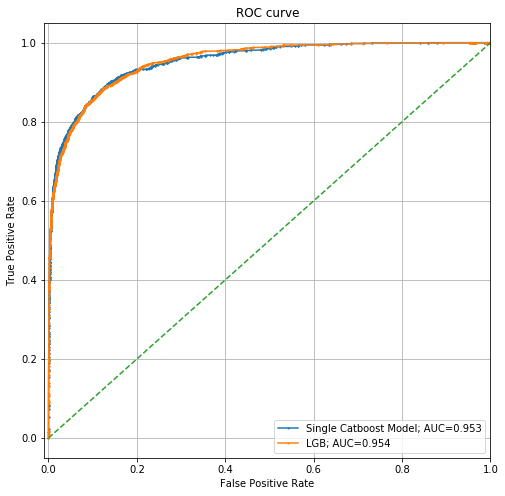

In [83]:
plot_roc(
    [df_val[target]]*2,
    [model_single.predict_proba(holdout_data)[:,1], bst.predict(df_val[numeric_cols+cat_cols_encoded].values, num_iteration=bst.best_iteration)],
    ['Single Catboost Model', 'LGB']
)

# CV
Use full training set

In [53]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)
models_cv = list()
for train_index, test_index in kf.split(df_train.index.values):
    print("Train shape: ", len(train_index))
    train_data = build_pool(df_train.iloc[train_index,:], features, cat_cols, target)
    holdout_data = build_pool(df_train.iloc[test_index,:], features, cat_cols, target)
    
    model = CatBoostClassifier(ignored_features=None, **params)
    model.fit(train_data, eval_set=holdout_data, plot=True, verbose=False)
    models_cv.append(model)

Train shape:  472432


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Train shape:  472432


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Train shape:  472432


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Train shape:  472432


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Train shape:  472432


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [71]:
test_data = build_pool(df_test, features, cat_cols)

In [72]:
y_test_catboost = model_single.predict_proba(test_data)[:,1]

In [88]:
y_test_lgb = bst.predict(df_test[numeric_cols + cat_cols_encoded].values, num_iteration=bst.best_iteration)

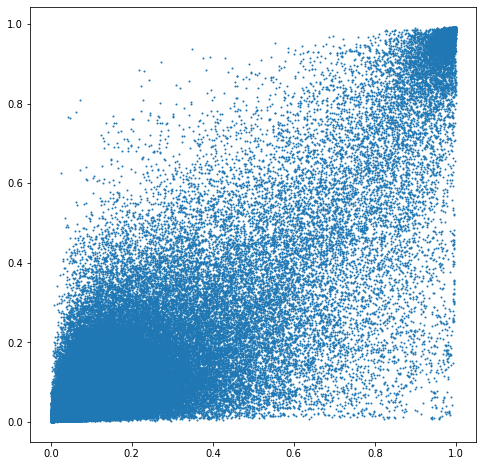

In [89]:
fig, ax = plt.subplots()
ax.scatter(x=y_test_catboost, y=y_test_lgb, s=1)

In [75]:
y_test_hats = list()
for model in models_cv:
    y_test_hats.append(model.predict_proba(test_data)[:,1])

In [90]:
y_test_hat = np.vstack([y_test_catboost, y_test_lgb]+y_test_hats).mean(axis=0)
df_test['isFraud'] = y_test_hat

In [91]:
df_test[['TransactionID', 'isFraud']].to_csv('data/submissions/submission_big_ensemble_v2.csv', index=False)

In [92]:
!kaggle competitions submit -c ieee-fraud-detection -f data/submissions/submission_big_ensemble_v2.csv -m "Cat + LGB-weighted + Cat_5fold"

100%|██████████████████████████████████████| 13.8M/13.8M [00:00<00:00, 16.1MB/s]
Successfully submitted to IEEE-CIS Fraud Detection